# Introduction

The NBA-games dataset is a really great dataset with lots of information about players, teams and results that can be put together in order to create a predictive model for future games. The main focus of the notebook is to create a dataset for predictive modelling and at a second step to trim it down to few features in order to enhance interpretability. Let's get started! 

We have 5 datasets at our disposal:

**Games:** Information about each game and the stats of the teams playing
| Field  | Description  |
|---|---|
| GAME_DATE_EST  | Game's date  |
| GAME_ID  | ID of the game  |
| GAME_STATUS_TEXT  |  Status : Final means that the is completed |
| HOME_TEAM_ID | ID of the home team |
| VISITOR_TEAM_ID | ID of the visitor team |
| SEASON | Season when the game occured |
| TEAM_ID_home | ID of the home team (dupplicate of HOME_TEAM_ID) |
| PTS_home | Number of points scored by home team |
| FG_PCT_home | Field Goal Percentage home team |
| FT_PCT_home | Free Throw Percentage of the home team |

<br></br>
**Games details:** More detailed information about the individual player stats
| Field  | Description  |
|---|---|
| GAME_ID | ID of the game |
| TEAM_ID | ID of the team |
| TEAM_ABBREVIATION | Team's abbreviation |
| TEAM_CITY | City where the game was played |
| PLAYER_ID | ID of the player |
| PLAYER_NAME | Player's name |
| NICKNAME | Position of the player (if nothing then he's on the bench) |
| START_POSITION | Comment |
| COMMENT | Note |
| MIN | Minutes Played |
| FGA | Field Goal Attempts |
| FGM | Field Goals Made |
| FG3A | 3pt attempts made |
| FG3M | 3pt shots made |
| FTA | Free Throw Attempts |
| FTM | Free Throws Made |
| OREB | Offensive Rebounds |
| DREB | Defensive Rebounds |
| REB  | Total Rebounds |
| AST  | Assists |
| STL  | Steal |
| BLK  | Block |
| TO | Turnover |
| PF | Personal Foul |
| PTS | Points Scored |
| PLUS_MINUS | A measure of a player's impact on the game.  It's calculated by comparing the point differential when a player is on the court versus when they are off the court.|

<br></br>
**Players:** Information about the name of the player and his team
| Field  | Description  |
|---|---|
| PLAYER_NAME | Player's name |
| TEAM_ID | ID of the team |
| PLAYER_ID | ID of the player |
| SEASON | Season |

<br></br>
**Ranking:** Information about the standings of each team on individual days throughout the season
| Field  | Description  |
|---|---|
| TEAM_ID | ID of the team |
| LEAGUE_ID | ID of the league (here only NBA) |
| SEASON_ID | Season |
| STANDINGSDATE | Standings date |
| CONFERENCE | Conference (west or east) |
| TEAM | Team name |
| G | Number of games played on the season |
| W | Number of winning games on the season |
| L | Number of loosing games on the season |
| W_PCT | Win % |

<br></br>
**Teams:** Information about the team including ownership, arena, when it was established etc.
| Field  | Description  |
|---|---|
| LEAGUE_ID | ID of the league (here only NBA) |
| TEAM_ID | ID of the team |
| MIN_YEAR | Minimum year of the team into NBA championship |
| MAX_YEAR | Maximum year of the team into NBA championship |
| ABBREVIATION | Abbreviation of team name |
| YEARFOUNDED | Founded Year |
| City | Team's city |
| ARENA | Team's stadium |
| ARENACAPACITY | Capacity of stadium |





# Import Libraries and Data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd


# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
games = pd.read_csv('games.csv')
games_details = pd.read_csv('games_details.csv')
players = pd.read_csv('players.csv')
ranking = pd.read_csv("ranking.csv")
teams = pd.read_csv("teams.csv")

/tmp/ipykernel_1824/1049295955.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv('games_details.csv')


# Data Check

#### **POINTS: 15**
- View the first five entries of each dataframe
- Determine the number of entries in each dataframe
- Check the data types for each dataframe
- Check for missing values
- Create a statistical summary of the numerical data



**Games:**

In [3]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.000,0.484,0.926,...,25.000,46.000,1610612759,117.000,0.478,0.815,0.321,23.000,44.000,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.000,0.488,0.952,...,16.000,40.000,1610612764,112.000,0.561,0.765,0.333,20.000,37.000,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.000,0.482,0.786,...,22.000,37.000,1610612749,106.000,0.470,0.682,0.433,20.000,46.000,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.000,0.441,0.909,...,27.000,49.000,1610612765,93.000,0.392,0.735,0.261,15.000,46.000,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.000,0.429,1.000,...,22.000,47.000,1610612741,110.000,0.500,0.773,0.292,20.000,47.000,0


In [4]:
len(games)

26651

In [5]:
games.dtypes

GAME_DATE_EST        object
GAME_ID               int64
GAME_STATUS_TEXT     object
HOME_TEAM_ID          int64
VISITOR_TEAM_ID       int64
SEASON                int64
TEAM_ID_home          int64
PTS_home            float64
FG_PCT_home         float64
FT_PCT_home         float64
FG3_PCT_home        float64
AST_home            float64
REB_home            float64
TEAM_ID_away          int64
PTS_away            float64
FG_PCT_away         float64
FT_PCT_away         float64
FG3_PCT_away        float64
AST_away            float64
REB_away            float64
HOME_TEAM_WINS        int64
dtype: object

In [6]:
games.isnull().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [7]:
games.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,26651.000,26651.000,26651.000,26651.000,26651.000,26552.000,26552.000,26552.000,26552.000,26552.000,26552.000,26651.000,26552.000,26552.000,26552.000,26552.000,26552.000,26552.000,26651.000
mean,21754866.961,1610612751.368,1610612751.408,2012.114,1610612751.368,103.456,0.461,0.760,0.356,22.823,43.374,1610612751.408,100.640,0.450,0.759,0.349,21.496,42.113,0.587
std,5570189.474,8.639,8.659,5.587,8.639,13.283,0.057,0.101,0.111,5.193,6.626,8.659,13.436,0.056,0.103,0.109,5.161,6.533,0.492
min,10300001.000,1610612737.000,1610612737.000,2003.000,1610612737.000,36.000,0.250,0.143,0.000,6.000,15.000,1610612737.000,33.000,0.244,0.143,0.000,4.000,19.000,0.000
25%,20700010.500,1610612744.000,1610612744.000,2007.000,1610612744.000,94.000,0.422,0.697,0.286,19.000,39.000,1610612744.000,91.000,0.412,0.692,0.278,18.000,38.000,0.000
50%,21200763.000,1610612751.000,1610612751.000,2012.000,1610612751.000,103.000,0.460,0.765,0.357,23.000,43.000,1610612751.000,100.000,0.449,0.765,0.350,21.000,42.000,1.000
75%,21800046.500,1610612759.000,1610612759.000,2017.000,1610612759.000,112.000,0.500,0.833,0.429,26.000,48.000,1610612759.000,110.000,0.487,0.833,0.419,25.000,46.000,1.000
max,52100211.000,1610612766.000,1610612766.000,2022.000,1610612766.000,168.000,0.684,1.000,1.000,50.000,72.000,1610612766.000,168.000,0.687,1.000,1.000,46.000,81.000,1.000


**Games Details:**

In [8]:
games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.000,1.000,2.000,0.000,1.000,0.000,2.000,5.000,2.000,-2.000
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.000,3.000,9.000,6.000,1.000,0.000,2.000,1.000,23.000,-14.000
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.000,3.000,4.000,1.000,1.000,0.000,2.000,4.000,13.000,-4.000
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.000,9.000,9.000,5.000,3.000,0.000,2.000,1.000,10.000,-18.000
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.000,2.000,2.000,3.000,0.000,0.000,2.000,2.000,19.000,0.000


In [9]:
len(games_details)

668628

In [10]:
games_details.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [11]:
games_details.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

In [12]:
games_details.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,668628.000,668628.000,668628.000,558938.000,558938.000,558938.000,558938.000,558938.000,558938.000,558938.000,...,558938.000,558938.000,558938.000,558938.000,558938.000,558938.000,558938.000,558938.000,558938.000,535277.000
mean,21717713.532,1610612751.400,401343.369,3.588,7.897,0.417,0.778,2.186,0.201,1.733,...,1.024,3.034,4.058,2.104,0.721,0.460,1.320,2.000,9.688,-0.000
std,5656289.029,8.652,7225617.747,3.030,5.677,0.252,1.228,2.570,0.290,2.354,...,1.398,2.687,3.483,2.475,0.972,0.861,1.402,1.503,8.082,10.666
min,10300001.000,1610612737.000,15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-57.000
25%,20700032.000,1610612744.000,2466.000,1.000,3.000,0.267,0.000,0.000,0.000,0.000,...,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,3.000,-7.000
50%,21200962.000,1610612751.000,201181.000,3.000,7.000,0.429,0.000,1.000,0.000,1.000,...,1.000,2.000,3.000,1.000,0.000,0.000,1.000,2.000,8.000,0.000
75%,21800141.000,1610612759.000,203471.000,5.000,11.000,0.571,1.000,4.000,0.400,3.000,...,2.000,4.000,6.000,3.000,1.000,1.000,2.000,3.000,14.000,6.000
max,52100211.000,1610612766.000,1962937827.000,28.000,50.000,1.000,14.000,24.000,1.000,26.000,...,18.000,25.000,31.000,25.000,10.000,12.000,12.000,15.000,81.000,57.000


**Players:**

In [13]:
players.head()

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [14]:
len(players)

7228

In [15]:
players.dtypes

PLAYER_NAME    object
TEAM_ID         int64
PLAYER_ID       int64
SEASON          int64
dtype: object

In [16]:
players.isnull().sum()

PLAYER_NAME    0
TEAM_ID        0
PLAYER_ID      0
SEASON         0
dtype: int64

In [17]:
players.describe()

,TEAM_ID,PLAYER_ID,SEASON
count,7228.000,7228.000,7228.000
mean,1610612751.369,2355861.976,2014.160
std,8.724,61066884.734,3.126
min,1610612737.000,244.000,2009.000
25%,1610612744.000,200768.000,2012.000
50%,1610612751.000,202346.500,2014.000
75%,1610612759.000,203910.000,2017.000
max,1610612766.000,1962937827.000,2019.000


**Ranking:**

In [18]:
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN


In [19]:
len(ranking)

210342

In [20]:
ranking.dtypes

TEAM_ID            int64
LEAGUE_ID          int64
SEASON_ID          int64
STANDINGSDATE     object
CONFERENCE        object
TEAM              object
G                  int64
W                  int64
L                  int64
W_PCT            float64
HOME_RECORD       object
ROAD_RECORD       object
RETURNTOPLAY     float64
dtype: object

In [21]:
ranking.isnull().sum()

TEAM_ID               0
LEAGUE_ID             0
SEASON_ID             0
STANDINGSDATE         0
CONFERENCE            0
TEAM                  0
G                     0
W                     0
L                     0
W_PCT                 0
HOME_RECORD           0
ROAD_RECORD           0
RETURNTOPLAY     206352
dtype: int64

In [22]:
ranking.describe()

,TEAM_ID,LEAGUE_ID,SEASON_ID,G,W,L,W_PCT,RETURNTOPLAY
count,210342.000,210342.000,210342.000,210342.000,210342.000,210342.000,210342.000,3990.000
mean,1610612751.474,0.000,21401.055,56.660,28.333,28.326,0.493,0.600
std,8.642,0.000,2395.250,28.644,17.269,17.261,0.188,0.490
min,1610612737.000,0.000,12003.000,0.000,0.000,0.000,0.000,0.000
25%,1610612744.000,0.000,22006.000,32.000,14.000,14.000,0.372,0.000
50%,1610612751.000,0.000,22011.000,67.000,28.000,29.000,0.500,1.000
75%,1610612759.000,0.000,22017.000,82.000,42.000,41.000,0.621,1.000
max,1610612766.000,0.000,22022.000,82.000,73.000,72.000,1.000,1.000


**Teams:**

In [23]:
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.000,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.000,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.000,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.000,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [24]:
len(teams)

30

In [25]:
teams.dtypes

LEAGUE_ID               int64
TEAM_ID                 int64
MIN_YEAR                int64
MAX_YEAR                int64
ABBREVIATION           object
NICKNAME               object
YEARFOUNDED             int64
CITY                   object
ARENA                  object
ARENACAPACITY         float64
OWNER                  object
GENERALMANAGER         object
HEADCOACH              object
DLEAGUEAFFILIATION     object
dtype: object

In [26]:
teams.isnull().sum()

LEAGUE_ID             0
TEAM_ID               0
MIN_YEAR              0
MAX_YEAR              0
ABBREVIATION          0
NICKNAME              0
YEARFOUNDED           0
CITY                  0
ARENA                 0
ARENACAPACITY         4
OWNER                 0
GENERALMANAGER        0
HEADCOACH             0
DLEAGUEAFFILIATION    0
dtype: int64

In [27]:
teams.describe()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,YEARFOUNDED,ARENACAPACITY
count,30.000,30.000,30.000,30.000,30.000,26.000
mean,0.000,1610612751.500,1969.700,2019.000,1969.700,18553.308
std,0.000,8.803,16.698,0.000,16.698,3916.923
min,0.000,1610612737.000,1946.000,2019.000,1946.000,0.000
25%,0.000,1610612744.250,1952.000,2019.000,1952.000,18641.500
50%,0.000,1610612751.500,1970.000,2019.000,1970.000,19131.000
75%,0.000,1610612758.750,1979.000,2019.000,1979.000,19790.750
max,0.000,1610612766.000,2002.000,2019.000,2002.000,21711.000


# Identifying And Treating Erroneous Data

We won't need to handle erroneous data as the NBA and their analysts have thoroughly cleaned and verified the values.

# Imputing Missing Data

In contrast to erroneous data, the NBA has deliberately chosen not to impute values for missing data. The NBA has opted not to impute missing values due to several reasons:

- Nature of Missing Data: Sometimes, missing data is random or unavoidable, and attempting to impute it could lead to assumptions that may not hold true in reality. The NBA chooses not to impute if they believe the missing data doesn't significantly impact the overall analysis or conclusions.
- Data Integrity: Imputing missing values potentially introduces inaccuracies or bias into the dataset. The NBA might prioritize data integrity to ensure that any analysis or decisions made are based on the most accurate information available.
- Statistical Impact: Imputation methods can skew statistical analysis or models. The NBA prefers transparency in reporting statistics and does not want to manipulate or fill in missing data that could alter the representation of actual trends or patterns.
- Ethical and Policy Reasons: There are ethical considerations or policy guidelines within the NBA that discourage the manipulation or estimation of data to maintain transparency and trust among stakeholders, fans, and analysts.

#### **POINTS: 25**
We will either impute the missing values or remove entries containing missing values to enhance the accuracy of our prediction models. Describe the rationale behind your choice to impute or remove these values. If imputation is chosen, explain the method employed for filling in the missing data.



In [28]:
games_mv = games.isnull().sum()
games.dropna(subset=['PTS_home'], inplace=True)
print(games_mv)

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64


I chose to remove all rows with missing values in the games section because there is barely any missing data compared to the amount of games that they have collected data for; removing this small amount of missing data won't affect the accuracy.

In [29]:
gd_mv = games_details.isnull().sum()
del games_details['NICKNAME']
del games_details['COMMENT']
print(gd_mv)


GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64


I chose to remove data such as player nicknames and that do not affect the outcome of the game. I decided to keep the missing data for the start position collumn and all of those affected by it because if a player does not start, the data will be missing which is important information to know so removing it or imputing it with the mean would get rid of this information.

In [30]:
ranking_mv = ranking.isnull().sum()
ranking['RETURNTOPLAY'].fillna(ranking['RETURNTOPLAY'].mean(), inplace=True)


For the ranking section, the RETURNTOPLAY collumn was the only collumn with missing data so I chose to apply the mean to all the missing values in this collumn. RETURNTOPLAY has missing values because some players have never gotten injured or came back after injury. By taking the average of that data of past injured players, our data will be able to predict RETURNTOPLAY of future injuries.

In [31]:
teams_mv = teams.isnull().sum()
del teams['ARENACAPACITY']
print(teams_mv)

LEAGUE_ID             0
TEAM_ID               0
MIN_YEAR              0
MAX_YEAR              0
ABBREVIATION          0
NICKNAME              0
YEARFOUNDED           0
CITY                  0
ARENA                 0
ARENACAPACITY         4
OWNER                 0
GENERALMANAGER        0
HEADCOACH             0
DLEAGUEAFFILIATION    0
dtype: int64


The only missing data in the teams section was the ARENACAPACITY collumn. There is so little data and it does not impact chances of winning so we can remove this data.      

# Merge games and games_details dataframes into a single dataframe

Run this cell only after you have handled the missing values in the games and games_details dataframes

In [32]:
data = pd.merge(games, games_details, on='GAME_ID', how='inner')
data.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.000,0.484,0.926,...,1.000,1.000,2.000,0.000,1.000,0.000,2.000,5.000,2.000,-2.000
1,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.000,0.484,0.926,...,6.000,3.000,9.000,6.000,1.000,0.000,2.000,1.000,23.000,-14.000
2,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.000,0.484,0.926,...,1.000,3.000,4.000,1.000,1.000,0.000,2.000,4.000,13.000,-4.000
3,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.000,0.484,0.926,...,0.000,9.000,9.000,5.000,3.000,0.000,2.000,1.000,10.000,-18.000
4,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.000,0.484,0.926,...,0.000,2.000,2.000,3.000,0.000,0.000,2.000,2.000,19.000,0.000


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) serves several crucial purposes in data analysis:

- EDA helps in understanding the structure, distribution, and nature of the dataset. It involves summarizing the main characteristics of the data and revealing underlying patterns or trends.
- EDA techniques uncover patterns, trends, correlations, and outliers within the data. This exploration helps identify potential relationships between variables and anomalies that might require further investigation.
- By exploring relationships between variables, EDA assists in selecting relevant features for analysis or modeling. It helps in understanding which variables might be more influential or predictive.
- EDA helps in generating and refining hypotheses about the data, guiding subsequent statistical tests or modeling. It allows analysts to formulate informed questions about the dataset for further investigation.
- EDA aids in visually and qualitatively presenting insights to stakeholders. Visualizations and summary statistics from EDA can effectively communicate complex findings in an accessible manner.

#### **POINTS: 40**
Your exploratory data analysis (EDA) will involve several key steps:

- Questioning the Dataframe: Begin by querying your dataset, posing specific questions, and seeking answers within the data.

- Visual Representation: Utilize a range of graphs and visualizations to explore various aspects of your data:
  
  - Univariate Analysis: Visualize distributions and counts for individual fields using histograms, boxplots, and countplots to understand their characteristics and variations.
  
  - Multivariate Analysis: Examine relationships and correlations between multiple fields through countplots, lmplots (for regression-based insights), and heatmaps to uncover connections and dependencies within the dataset.

By combining these approaches, you can gain a deeper understanding of your data, revealing patterns, outliers, relationships, and key insights that pave the way for informed decision-making and further analysis.

Your analysis needs to pose and answer a minimum of **eight questions** that aid in comprehending the factors influencing a team's victory in a game. Additionally, create **eight graphs** that visually represent and elucidate the data and include a brief caption explaining what the graph shows.


MY DATA ANALYSIS:

### Question 1: How many points were scored by the away team vs home team (how big is home court advatage)?

Points scored by home team:

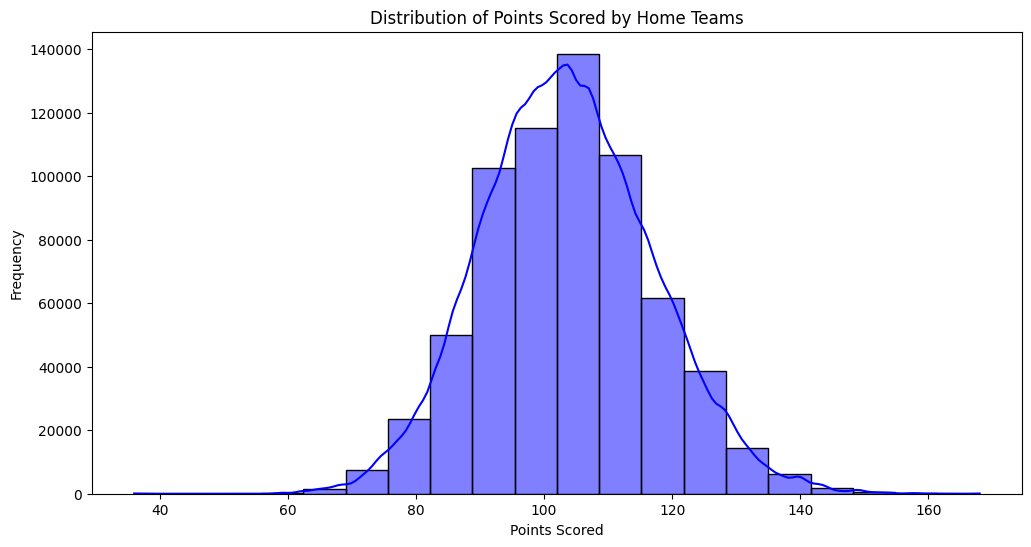

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(data['PTS_home'], bins=20, kde=True, color='blue')
plt.title('Distribution of Points Scored by Home Teams')
plt.xlabel('Points Scored')
plt.ylabel('Frequency')
plt.show()

Points scored by away team:

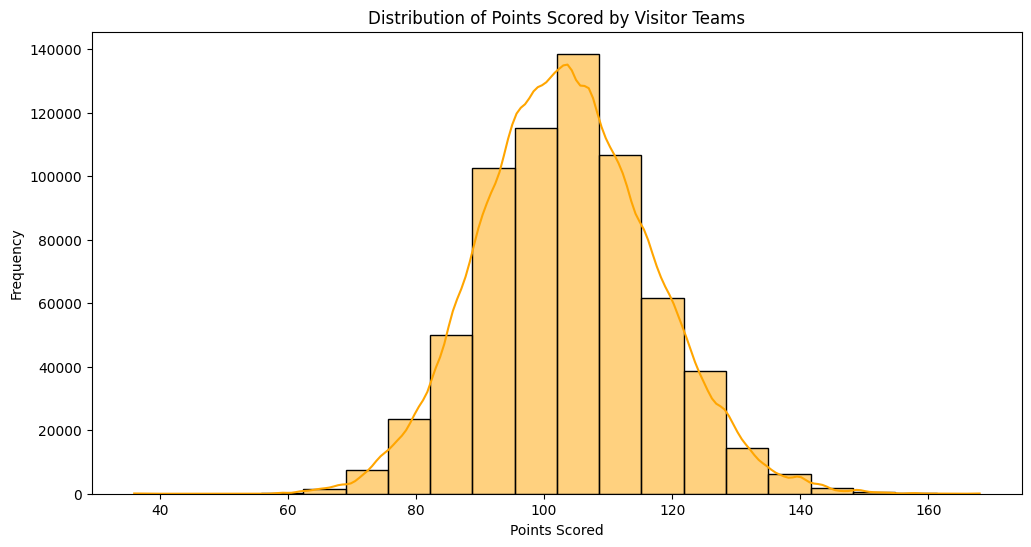

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data['PTS_home'], bins=20, kde=True, color='orange')
plt.title('Distribution of Points Scored by Visitor Teams')
plt.xlabel('Points Scored')
plt.ylabel('Frequency')
plt.show()

In [35]:
home_wins = data[data['GAME_STATUS_TEXT'] == 'Final'][data['PTS_home'] > data['PTS_away']]['TEAM_ABBREVIATION'].value_counts()
visitor_wins = data[data['GAME_STATUS_TEXT'] == 'Final'][data['PTS_home'] < data['PTS_away']]['TEAM_ABBREVIATION'].value_counts()

advantage_percentage = (home_wins / (home_wins + visitor_wins)) * 100


/tmp/ipykernel_1824/1679963190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=advantage_percentage.index, y=advantage_percentage, palette='Set2')


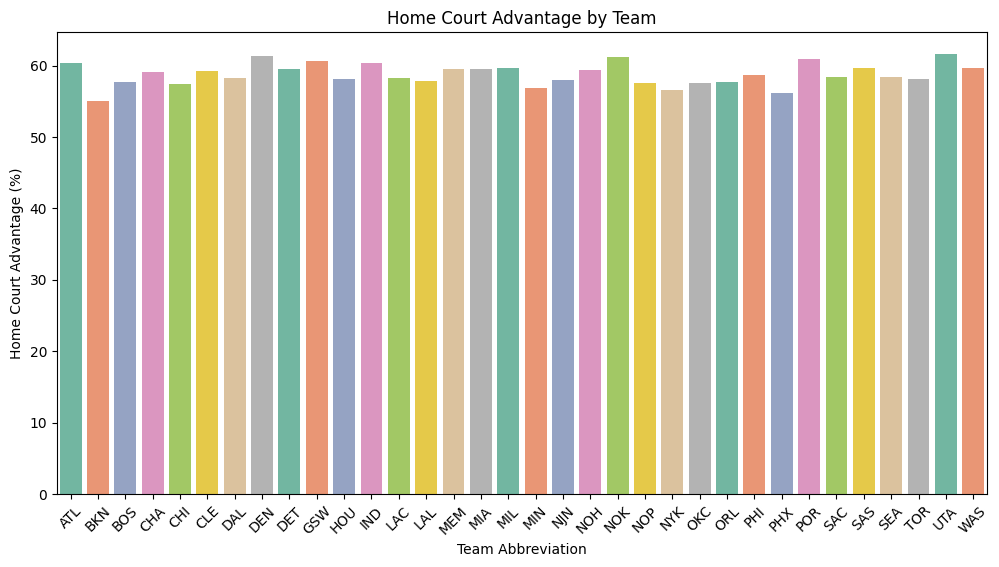

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x=advantage_percentage.index, y=advantage_percentage, palette='Set2')
plt.title('Home Court Advantage by Team')
plt.xlabel('Team Abbreviation')
plt.ylabel('Home Court Advantage (%)')
plt.xticks(rotation=45)
plt.show()

## Question 2: What teams have the highest plus/minus?

In [37]:
data['PLUS_MINUS'] = data['PTS_home'] - data['PTS_away']


/tmp/ipykernel_1824/651885499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TEAM_ABBREVIATION', y='PLUS_MINUS', data=data, palette='viridis')


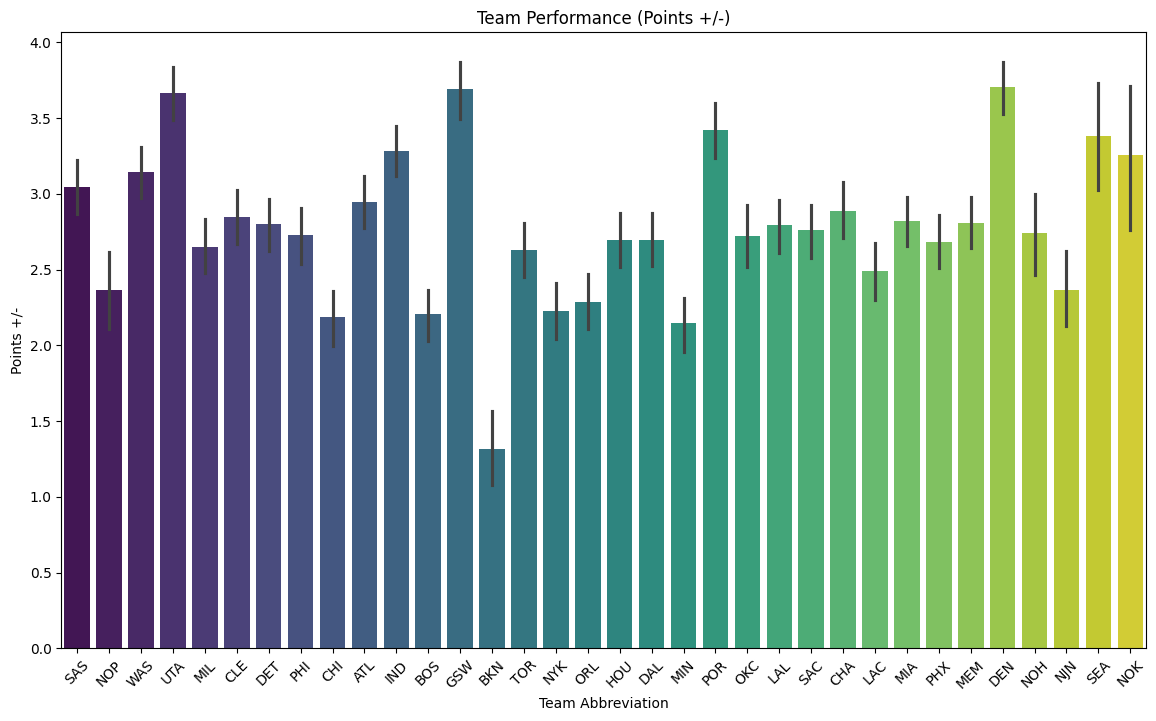

In [38]:
plt.figure(figsize=(14, 8))
sns.barplot(x='TEAM_ABBREVIATION', y='PLUS_MINUS', data=data, palette='viridis')
plt.title('Team Performance (Points +/-)')
plt.xlabel('Team Abbreviation')
plt.ylabel('Points +/-')
plt.xticks(rotation=45)
plt.show()

## Question 3: What teams score the most points per game?

In [39]:
average_points_by_team = data.groupby('TEAM_ABBREVIATION')['PTS_home'].mean().reset_index()
average_points_by_team = average_points_by_team.sort_values(by='PTS_home', ascending=False)


/tmp/ipykernel_1824/1098135668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TEAM_ABBREVIATION', y='PTS_home', data=average_points_by_team, palette='Blues')


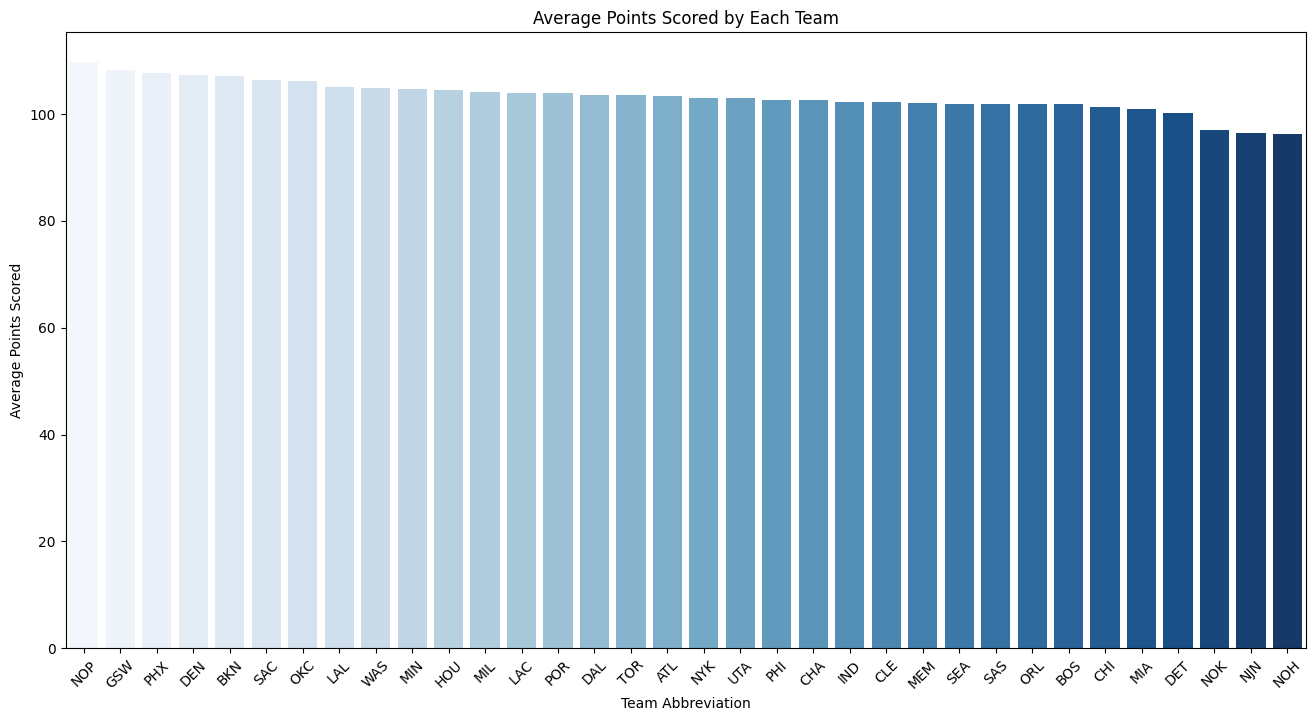

In [40]:
plt.figure(figsize=(16, 8))
sns.barplot(x='TEAM_ABBREVIATION', y='PTS_home', data=average_points_by_team, palette='Blues')
plt.title('Average Points Scored by Each Team')
plt.xlabel('Team Abbreviation')
plt.ylabel('Average Points Scored')
plt.xticks(rotation=45)
plt.show()

# Predictive Classification Model

#### **POINTS: 20**
Use the Pycaret library to generate a binary classification model to predict the outcome of games. 

[Pycaret Tutorials](https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb)

Explain which metric one should use to evaluate the predition model (accuracy, precision, recall or F1-score).